<a href="https://colab.research.google.com/github/mayraberrones94/Analisis_Algoritmos/blob/master/Cluster_tipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.applications.vgg16 import preprocess_input 

# models 
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle


In [2]:
path = r"/content/drive/MyDrive/Visual Studio/todas_224"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [3]:
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)


553467096/553467096 [==============================] - 4s 0us/step


In [4]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [5]:
data = {}
p = r"/content/drive/MyDrive/Visual Studio/todas_224/images_features.pkl"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 1s 587ms/step


In [6]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv('images_labels.csv')
#label = df['label'].tolist()
unique_labels = [0, 1, 2, 3, 4]#list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [7]:
# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [8]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (20, 20));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:29]
     #plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Text(0, 0.5, 'Sum of squared distance')

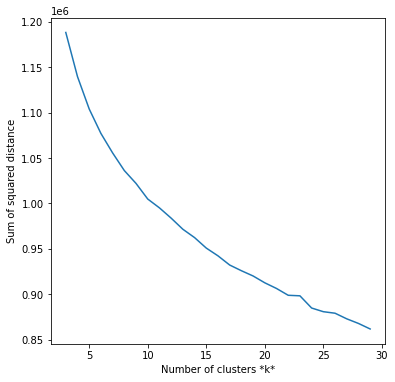

In [9]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 30))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')


In [10]:
print(groups[0])
print(groups[1])
print(groups[2])
print(groups[3])
print(groups[4])


['anomalia_21.png', 'anomalia_32.png', 'anomalia_35.png', 'anomalia_33.png', 'anomalia_18.png', 'anomalia_27.png', 'normal_14.png', 'normal_5.png', 'normal_31.png', 'normal_8.png', 'normal_9.png', 'normal_26.png', 'normal_16.png', 'normal_2.png', 'normal_4.png', 'normal_33.png', 'normal_17.png', 'anomalia_in_62.png', 'anomalia_in_86.png', 'anomalia_in_33.png', 'anomalia_in_5.png', 'anomalia_in_52.png', 'anomalia_in_25.png', 'anomalia_in_84.png', 'anomalia_in_36.png', 'anomalia_in_64.png', 'anomalia_in_124.png', 'anomalia_in_92.png', 'anomalia_in_38.png', 'anomalia_in_79.png', 'anomalia_in_98.png', 'anomalia_in_120.png', 'anomalia_in_42.png', 'anomalia_in_6.png', 'anomalia_in_10.png', 'anomalia_in_107.png', 'anomalia_in_11.png', 'anomalia_in_59.png', 'anomalia_in_70.png', 'anomalia_in_82.png', 'anomalia_in_72.png', 'anomalia_in_69.png', 'anomalia_in_333.png', 'anomalia_in_185.png', 'anomalia_in_236.png', 'anomalia_in_278.png', 'anomalia_in_220.png', 'anomalia_in_135.png', 'anomalia_in_2

Clipping cluster size from 164 to 10


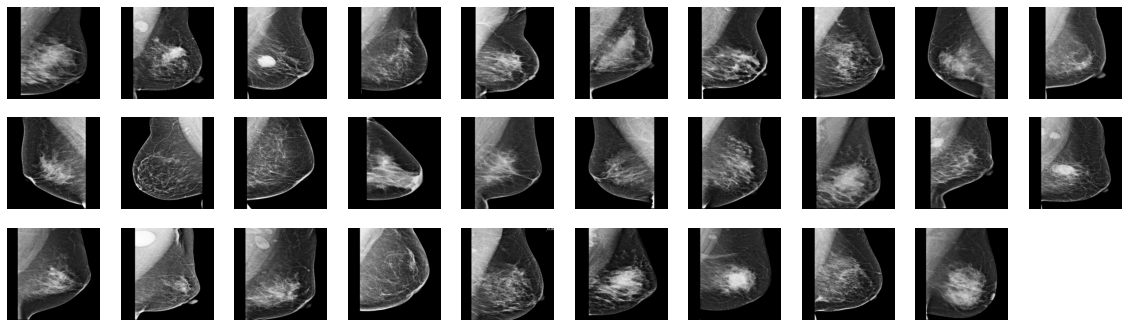

In [11]:
view_cluster(0)

Clipping cluster size from 266 to 10


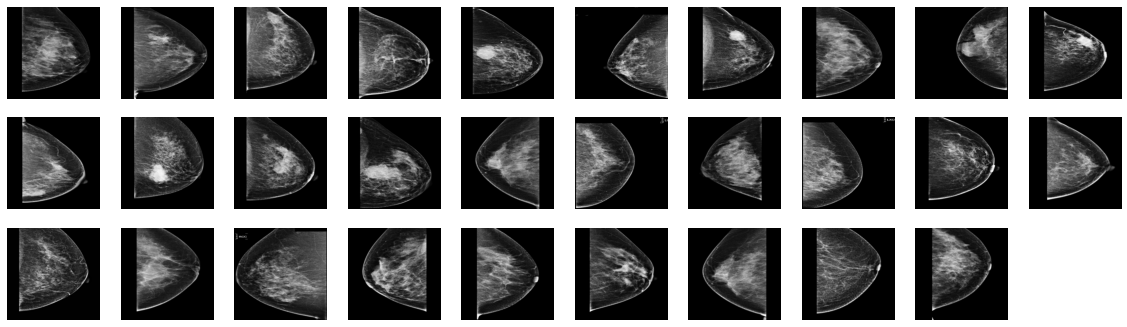

In [12]:
view_cluster(1)

Clipping cluster size from 180 to 10


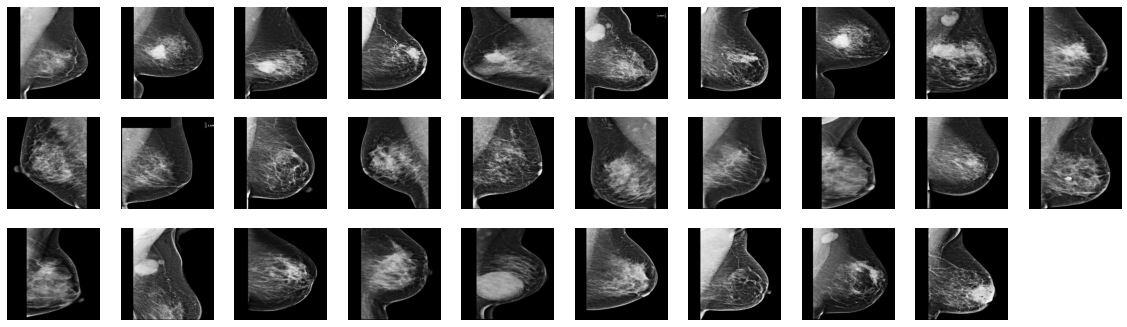

In [13]:
view_cluster(2)

Clipping cluster size from 171 to 10


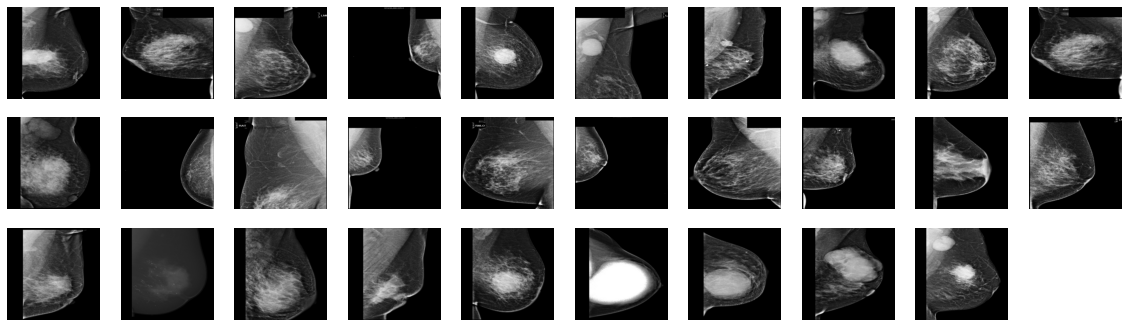

In [14]:
view_cluster(3)

Clipping cluster size from 162 to 10


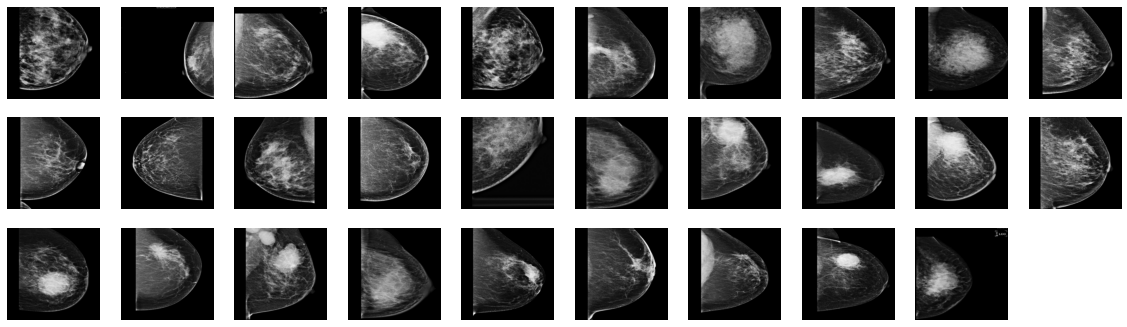

In [15]:
view_cluster(4)